In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
cdfx = pd.read_csv("../csv/catapult_tempmatch_latency.csv", index_col=0)
vdfx = pd.read_csv("../csv/catapult_tempmatch_area.csv", index_col=0)
li=[]
viv_violin=pd.read_csv("../csv/catapult_tempmatch_area_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_tempmatch_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True)
l2=[]
l2.append(violin)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = vdfx['ff'].min()*1/cdfx['ff']
vdfx['ff_inv'] = vdfx['ff'].min()*1/vdfx['ff']
cdfx['lut_inv'] = vdfx['lut'].min()*1/cdfx['lut']
vdfx['lut_inv'] = vdfx['lut'].min()*1/vdfx['lut']
cdfx['1/obj2'] = vdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = vdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780

cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['tmpsize'])
cdfx = cdfx.drop(columns=['size'])
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['tmpsize'])
vdfx = vdfx.drop(columns=['size'])


Text(0.5, 1.0, 'Catapult Template Matching Results')

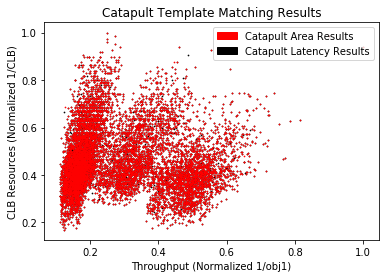

In [2]:
ax1 = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='black', s=0.5)
ax = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r', ax=ax1, s=0.5)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult Area Results')
green_data = mpatches.Patch(color='black', label='Catapult Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Catapult Template Matching Results")

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

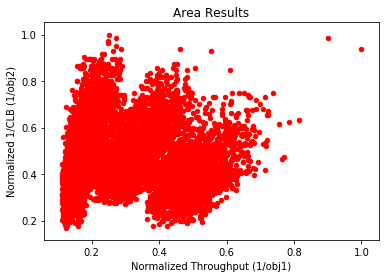

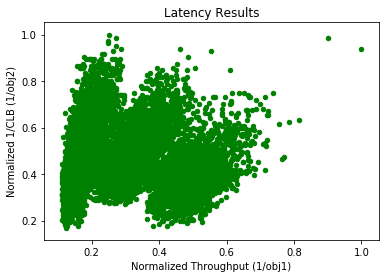

In [3]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.title('Area Results')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
plt.title('Latency Results')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

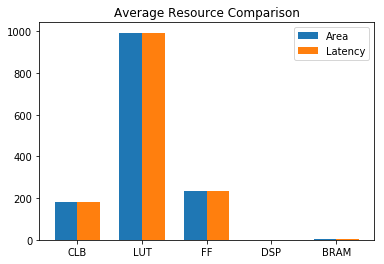

In [4]:
fig, ax = plt.subplots()

N=5
area_val=(vdfx['obj2'].mean(),vdfx['lut'].mean(),vdfx['ff'].mean(),vdfx['dsp'].mean(),vdfx['bram'].mean())
latency_val=(cdfx['obj2'].mean(),cdfx['lut'].mean(),cdfx['ff'].mean(),cdfx['dsp'].mean(),cdfx['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,area_val,width,label='area')
p2=ax.bar(ind+width,latency_val,width,label='latency')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Area', 'Latency'))

ax.autoscale_view()
plt.show()

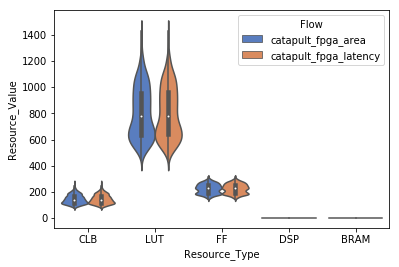

In [5]:
ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Flow",
                    data=violin, palette="muted",
                    scale="count")

0.29528315327988963 0.2953474523826069


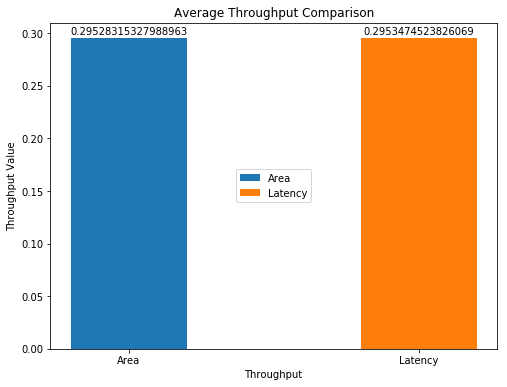

In [6]:
fig, ax = plt.subplots()

N=1
area_val=(vdfx['throughput'].mean())
latency_val=(cdfx['throughput'].mean())
print(area_val,latency_val)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.set_size_inches(8, 6, forward=True)


ind1=[0,0.025]
width = 0.01 
labels=['Area','Latency']
p1=ax.bar(0,area_val,width,label='Area')
p2=ax.bar(0.025,latency_val,width,label='Latency')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')
ax.set_ylabel('Throughput Value')
ax.set_xticks(ind1)
ax.set_xticklabels(labels)
        
autolabel(p1)
autolabel(p2)
ax.legend((p1[0], p2[0]), ('Area', 'Latency'),loc="center")

ax.autoscale_view()
plt.show()

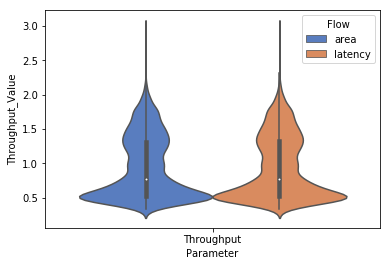

In [7]:
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Flow",palette="muted",scale="count")

In [8]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, 
                 on=
                 [
                    'knob_tmpdim',
                    'knob_indim',        
                    'knob_UNROLL_FACTOR',
                    'knob_UNROLL_LOOP1', 
                    'knob_UNROLL_LOOP2', 
                    'knob_UNROLL_LOOP3', 
                    'knob_UNROLL_LOOP4' 
                 ], how='inner')

(0, 1)

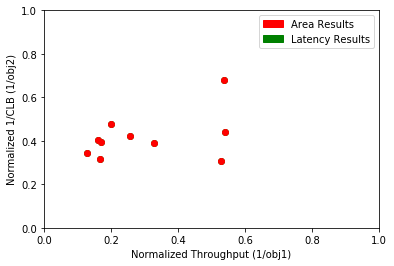

In [9]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='red', label='Area Results')
green_data = mpatches.Patch(color='green', label='Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 1)

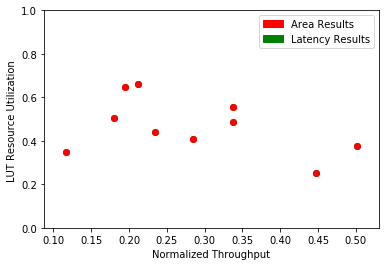

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='red', label='Area Results')
green_data = mpatches.Patch(color='green', label='Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('LUT Resource Utilization ')
plt.ylim(0, 1)